# Amazon Braket Cheat Sheet

Braket is the Quantum Computing SDK used to access the Amazon Braket Service from AWS. 
This short cheat sheet will help you work through the Manning Braket Live Project. 

### Installation

To install python library to give you the tools to access object to create circuits, gates and to run circuits in either a local simulator which is included in the SDK or to access real quantum hardware available from the braket service using your AWS credentials (see https://docs.aws.amazon.com/general/latest/gr/aws-sec-cred-types.html)


In [4]:
#!pip install amazon-braket-sdk
# Remove the comment above to install

### Loading Braket into a Python Notebook 

In [7]:
import braket._sdk as braket_sdk
braket_sdk.__version__

'1.7.1'

### Setting your device to Localsimulator

The Amazon Braket Python SDK includes an implementation of quantum simulators that can run circuits on your local, classic hardware. For example the braket_sv local simulator is well suited for rapid prototyping on small circuits up to 25 qubits - which is dependent on you hardware memory and processor.

In [8]:
from braket.devices import LocalSimulator
device = LocalSimulator('braket_dm')

In [9]:
device

# Creating Quantum Circuits

To start creating quantum circuits, you need to import the Circuit and Gate classes

In [12]:
from braket.circuits import Circuit, Gate

You can now instantiate the Circuit class to create a 'mycircuit' object

In [21]:
mycircuit = Circuit()

You can now add gates to your circuits. 
To do this you can call a function which corresponds to the gate you want to add to you circuit. The arguement of of the function call will also indicate which qubit you want to add that gate to. For example:

In [22]:
mycircuit.h(0)
print(mycircuit)

T  : |0|
        
q0 : -H-

T  : |0|


add a Hadamard Gate to the Qubit 0. and

In [23]:
mycircuit.x(1)
print(mycircuit)

T  : |0|
        
q0 : -H-
        
q1 : -X-

T  : |0|


add a X gate (Pauli-X) gate to the first Qubit. Note : See Pauli Gates for more info https://en.wikipedia.org/wiki/Quantum_logic_gate#Pauli_gates_(X,Y,Z)


As you can see you can print the circuit object to get an representation of you circuit.

Braket has a number of Quantum Gates which have been implemented. To list the number of gates you can use run the following code. 

In [33]:
def listGates():
    for gate in dir(Gate):    
        if gate[0].isupper():
            print(gate)
listGates()

CCNot
CNot
CPhaseShift
CPhaseShift00
CPhaseShift01
CPhaseShift10
CSwap
CY
CZ
H
I
ISwap
PSwap
PhaseShift
Rx
Ry
Rz
S
Si
Swap
T
Ti
Unitary
V
Vi
X
XX
XY
Y
YY
Z
ZZ


# Running your Circuit on a Simulator

You can run your circuit on the device object you created earlier as below.

In [27]:
run = device.run(mycircuit, shots=100)

One you have run you circuit, you can review the results using the results() method. This will provide all the data at once.

In [ ]:
run.result()

You can specify what part of the result you want to see to make reviewing easier as below. 

In [30]:
result = run.result() # Just adding it to a variable to make the code easy to read
result.measurement_counts

Counter({'11': 49, '01': 51})

In the above call we are reviewing the counts of what the output measurement was. In my run (yours may vary) I have 49 runs coming out with a Qubit0 = 1 and Qubit1 =1 and 51 runs where Qubit0 = 1 and Qubit1 = 1. 

# Plotting your results

You can plot your measurements in a nice bar graph using matplotlib

In [36]:
import matplotlib.pyplot as plt
# import seaborn as sns

In [37]:
counts = result.measurement_counts

Text(0, 0.5, 'counts')

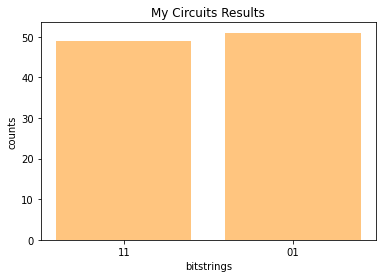

In [40]:
# sns.set_theme(style="white")
plt.bar(counts.keys(), counts.values(), alpha=0.5, color='darkorange')
plt.title("My Circuits Results")
plt.xlabel('bitstrings')
plt.ylabel('counts')